In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
# from torchvision import models
# from torchvision import transforms, utils
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [2]:
from torch.utils.data import DataLoader, Dataset


In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
np.set_printoptions(suppress=True)
torch.set_printoptions(precision=4, sci_mode=False)

In [121]:
?torch.set_printoptions

In [8]:
from tagger import MLP, Vocab, DataFile, Trainer, SubWords, MLPSubWords, CnnMLPSubWords, CharsVocab
from preprocessing import TitleProcess


In [9]:
task = "ner"

In [13]:
char_vocab = CharsVocab(task)
vocab = Vocab(task, False)
model = CnnMLPSubWords(50, 200, vocab, 30, 30, 5, char_vocab)


In [18]:
model_path=r"C:\Dev\DL_EX2\Submit\part5\part_5_task_ner_lr_0.001_epoch_7_batch_size_32_filter_num_30_window_size_5_steps_to_eval_30000_optim_AdamW_hidden_dim_200.bin"

In [19]:
model.load_model(model_path)

In [20]:
model

CnnMLPSubWords(
  (embedding): Embedding(23627, 50)
  (linear1): Linear(in_features=250, out_features=200, bias=True)
  (tanh): Tanh()
  (linear2): Linear(in_features=200, out_features=5, bias=True)
  (char_embeddings): Embedding(86, 30, padding_idx=21)
  (conv): Conv2d(5, 150, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=5)
  (relu): LeakyReLU(negative_slope=0.01)
  (max_pool): MaxPool3d(kernel_size=20, stride=(30, 5, 1), padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=305, out_features=200, bias=True)
)

In [21]:
from preprocessing import TitleProcess
title_process = TitleProcess()
dev_df = DataFile(task, 'dev', title_process, vocab, None, char_vocab)
data_loader = DataLoader(dev_df, batch_size=1)

In [22]:
dev_df.data[200]

InputExample(guid='C:\\Dev\\DL_EX2\\data\\ner\\dev-9-200', words=[',', 'as', 'Essex', 'reached', '372'], label='ORG')

In [23]:
data = [i for i in data_loader]

In [58]:
sample_i = 3
print(dev_df.data[sample_i])
data_sample, label = data[sample_i]

InputExample(guid='C:\\Dev\\DL_EX2\\data\\ner\\dev-2-3', words=['Cricket', '-', 'Leicestershire', 'Take', 'Over'], label='ORG')


In [38]:
words_tensor = data_sample[:, :, -1]
chars_tensor = data_sample[:, :, :-1] 

In [39]:
chars_tensor

tensor([[[53, 14, 14, 12, 70, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
          21, 21, 21],
         [41, 12, 40, 67, 81, 12, 16, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
          21, 21, 21],
         [61, 20, 52, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
          21, 21, 21],
         [40, 42, 16, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
          21, 21, 21],
         [59,  3,  3, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
          21, 21, 21]]])

In [40]:
chars_emb = model.char_embeddings(chars_tensor)
chars_vis = chars_emb.detach().squeeze()

In [41]:
first_word_chars_vec = chars_vis[0]

In [42]:
first_word_chars_vec

tensor([[-0.0568,  0.1722, -0.1272,  0.1226,  0.1614, -0.1594,  0.0850,  0.1604,
         -0.2139, -0.2172, -0.2262, -0.3361, -0.4424,  0.5296,  0.3894,  0.0115,
         -0.3080, -0.2774,  0.0758, -0.0073, -0.1021, -0.2653, -0.0577, -0.0177,
          0.0759,  0.2982, -0.1690,  0.0666, -0.0266,  0.0453],
        [-0.3449, -0.5545,  0.3402,  0.3221, -0.2134,  0.1797, -0.1650,  0.0068,
          0.1578,  0.2793,  0.3755,  0.2552,  0.0979,  0.1531, -0.3302, -0.0572,
         -0.2078,  0.0017,  0.0923,  0.2972,  0.3042,  0.1019, -0.2278,  0.0840,
          0.0568, -0.0301, -0.0596, -0.0976,  0.0975, -0.1845],
        [-0.3449, -0.5545,  0.3402,  0.3221, -0.2134,  0.1797, -0.1650,  0.0068,
          0.1578,  0.2793,  0.3755,  0.2552,  0.0979,  0.1531, -0.3302, -0.0572,
         -0.2078,  0.0017,  0.0923,  0.2972,  0.3042,  0.1019, -0.2278,  0.0840,
          0.0568, -0.0301, -0.0596, -0.0976,  0.0975, -0.1845],
        [ 0.3116,  0.1881, -0.0871,  0.2092, -0.1033,  0.1117, -0.1346,  0.1487

word1


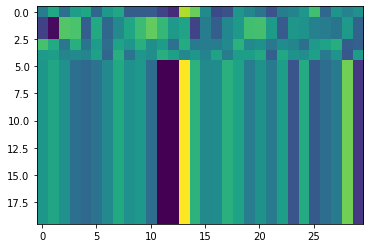

In [43]:
print("word1")
plt.imshow(first_word_chars_vec)

word4


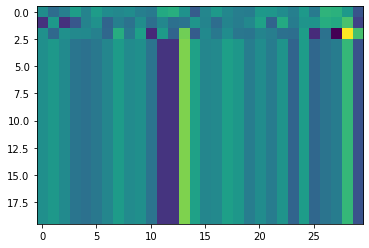

In [44]:
print("word4")
plt.imshow(chars_vis[2])

word2


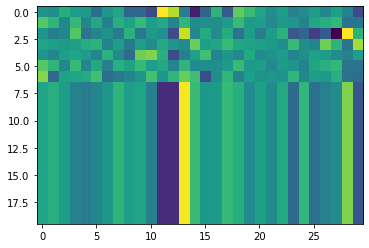

In [45]:
print("word2")
plt.imshow(chars_emb.detach().squeeze()[1].numpy())

word1


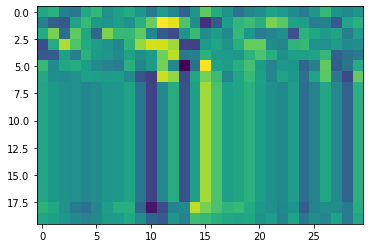

In [46]:
print("word1")
plt.imshow(model.conv(chars_emb).detach().squeeze()[4].numpy())

word3


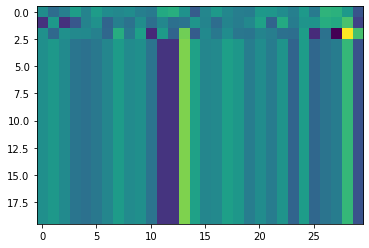

In [47]:
print("word3")
plt.imshow(chars_emb.detach().squeeze()[2].numpy())

In [54]:
data[sample_i]

[tensor([[[   81,    12,    40,    16,    21,    21,    21,    21,    21,    21,
              21,    21,    21,    21,    21,    21,    21,    21,    21,    21,
           23594],
          [    3,    34,    21,    21,    21,    21,    21,    21,    21,    21,
              21,    21,    21,    21,    21,    21,    21,    21,    21,    21,
           21053],
          [   59,    81,    12,    21,    21,    21,    21,    21,    21,    21,
              21,    21,    21,    21,    21,    21,    21,    21,    21,    21,
           15445],
          [   67,     3,    79,    42,    59,    45,    21,    21,    21,    21,
              21,    21,    21,    21,    21,    21,    21,    21,    21,    21,
           21473],
          [   67,    81,    40,    74,    63,    49,     3,    42,    14,    81,
              49,    63,    21,    21,    21,    21,    21,    21,    21,    21,
           16232]]]),
 tensor([[1]])]

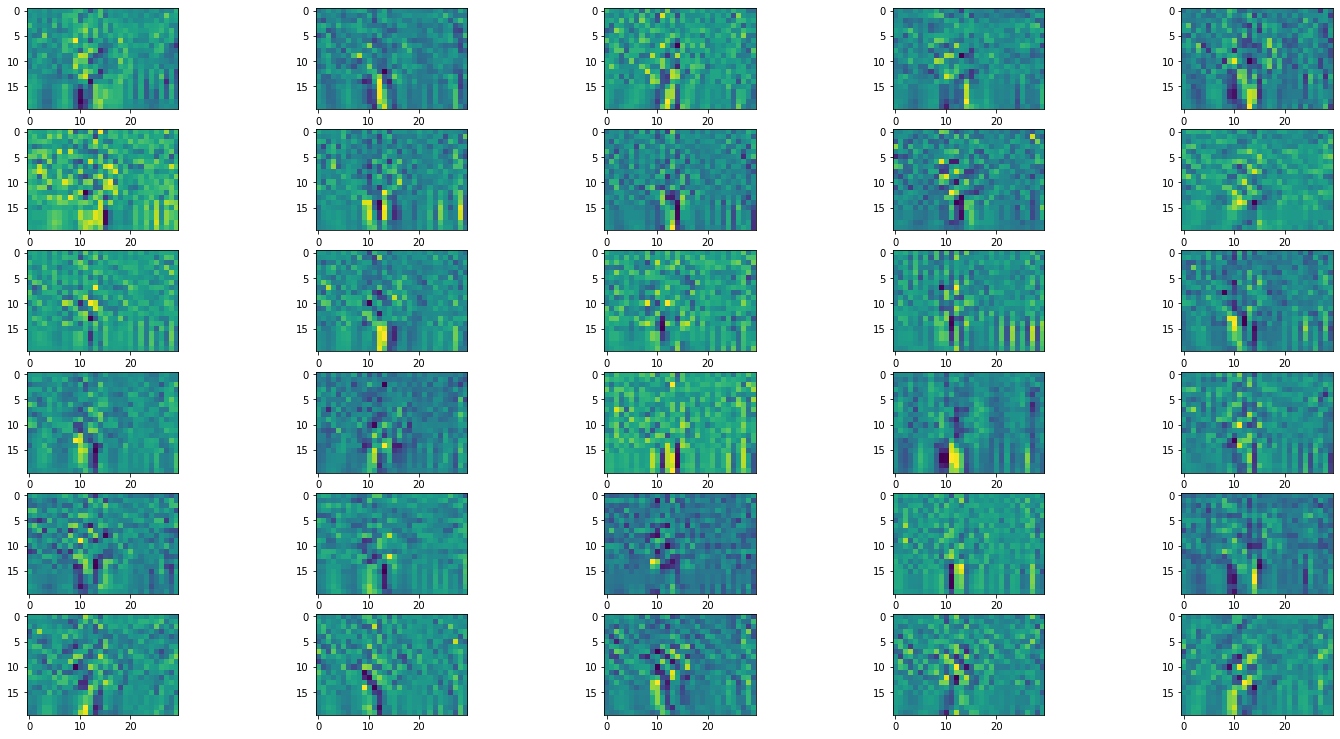

In [60]:
import matplotlib.pyplot as plt

# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv.register_forward_hook(get_activation('conv'))
sample, _ = data[5]
output = model(sample)

act = activation['conv'].squeeze()
fig, axarr = plt.subplots(ncols=5,nrows=6, figsize=(25, 13))
i = 0
for col in range(5):
    for row in range(6): 

        axarr[row, col].imshow(act[i].squeeze())
        i+=1


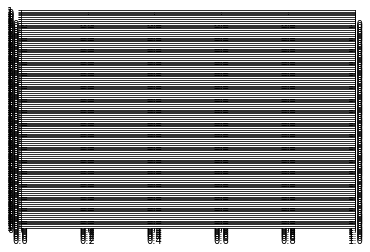

In [170]:
fig, axarr = plt.subplots(20)

In [41]:
#Add the batch size
image = image.unsqueeze(0)

In [42]:
#Wrap it up in a variable
image = Variable(image)

In [43]:
#Transfer it to the GPU
if CUDA:
    image = image.cuda()

In [44]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [45]:
output = vgg(image)

In [46]:
print(output.shape)

torch.Size([1, 1000])


In [47]:
#Transfer the 2D Tensor to 1D
output = output.squeeze(0)

In [48]:
print(output.shape)

torch.Size([1000])


In [49]:
labels = json.load(open('image_net_class.json'))

In [50]:
index = output.max(0)

In [51]:
print(index)

torch.return_types.max(
values=tensor(24.9414, grad_fn=<MaxBackward0>),
indices=tensor(214))


In [52]:
index[1].item()

214

In [53]:
index = str(index[1].item())
label = labels[index][1]

In [54]:
print(label)

Gordon_setter


In [55]:
module_list = list(vgg.features.modules())

In [56]:
print(vgg.features)
print(module_list[0])
print(module_list[1])
print(module_list[2])
module_list

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (17): Conv2d(

In [57]:
outputs = []
names = []
for layer in module_list[1:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))

In [58]:
for feature_map in outputs:
    print(feature_map.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])


In [59]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    #Convert the 3D Tensor to 2D. Sum the same element of every channel
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale/feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

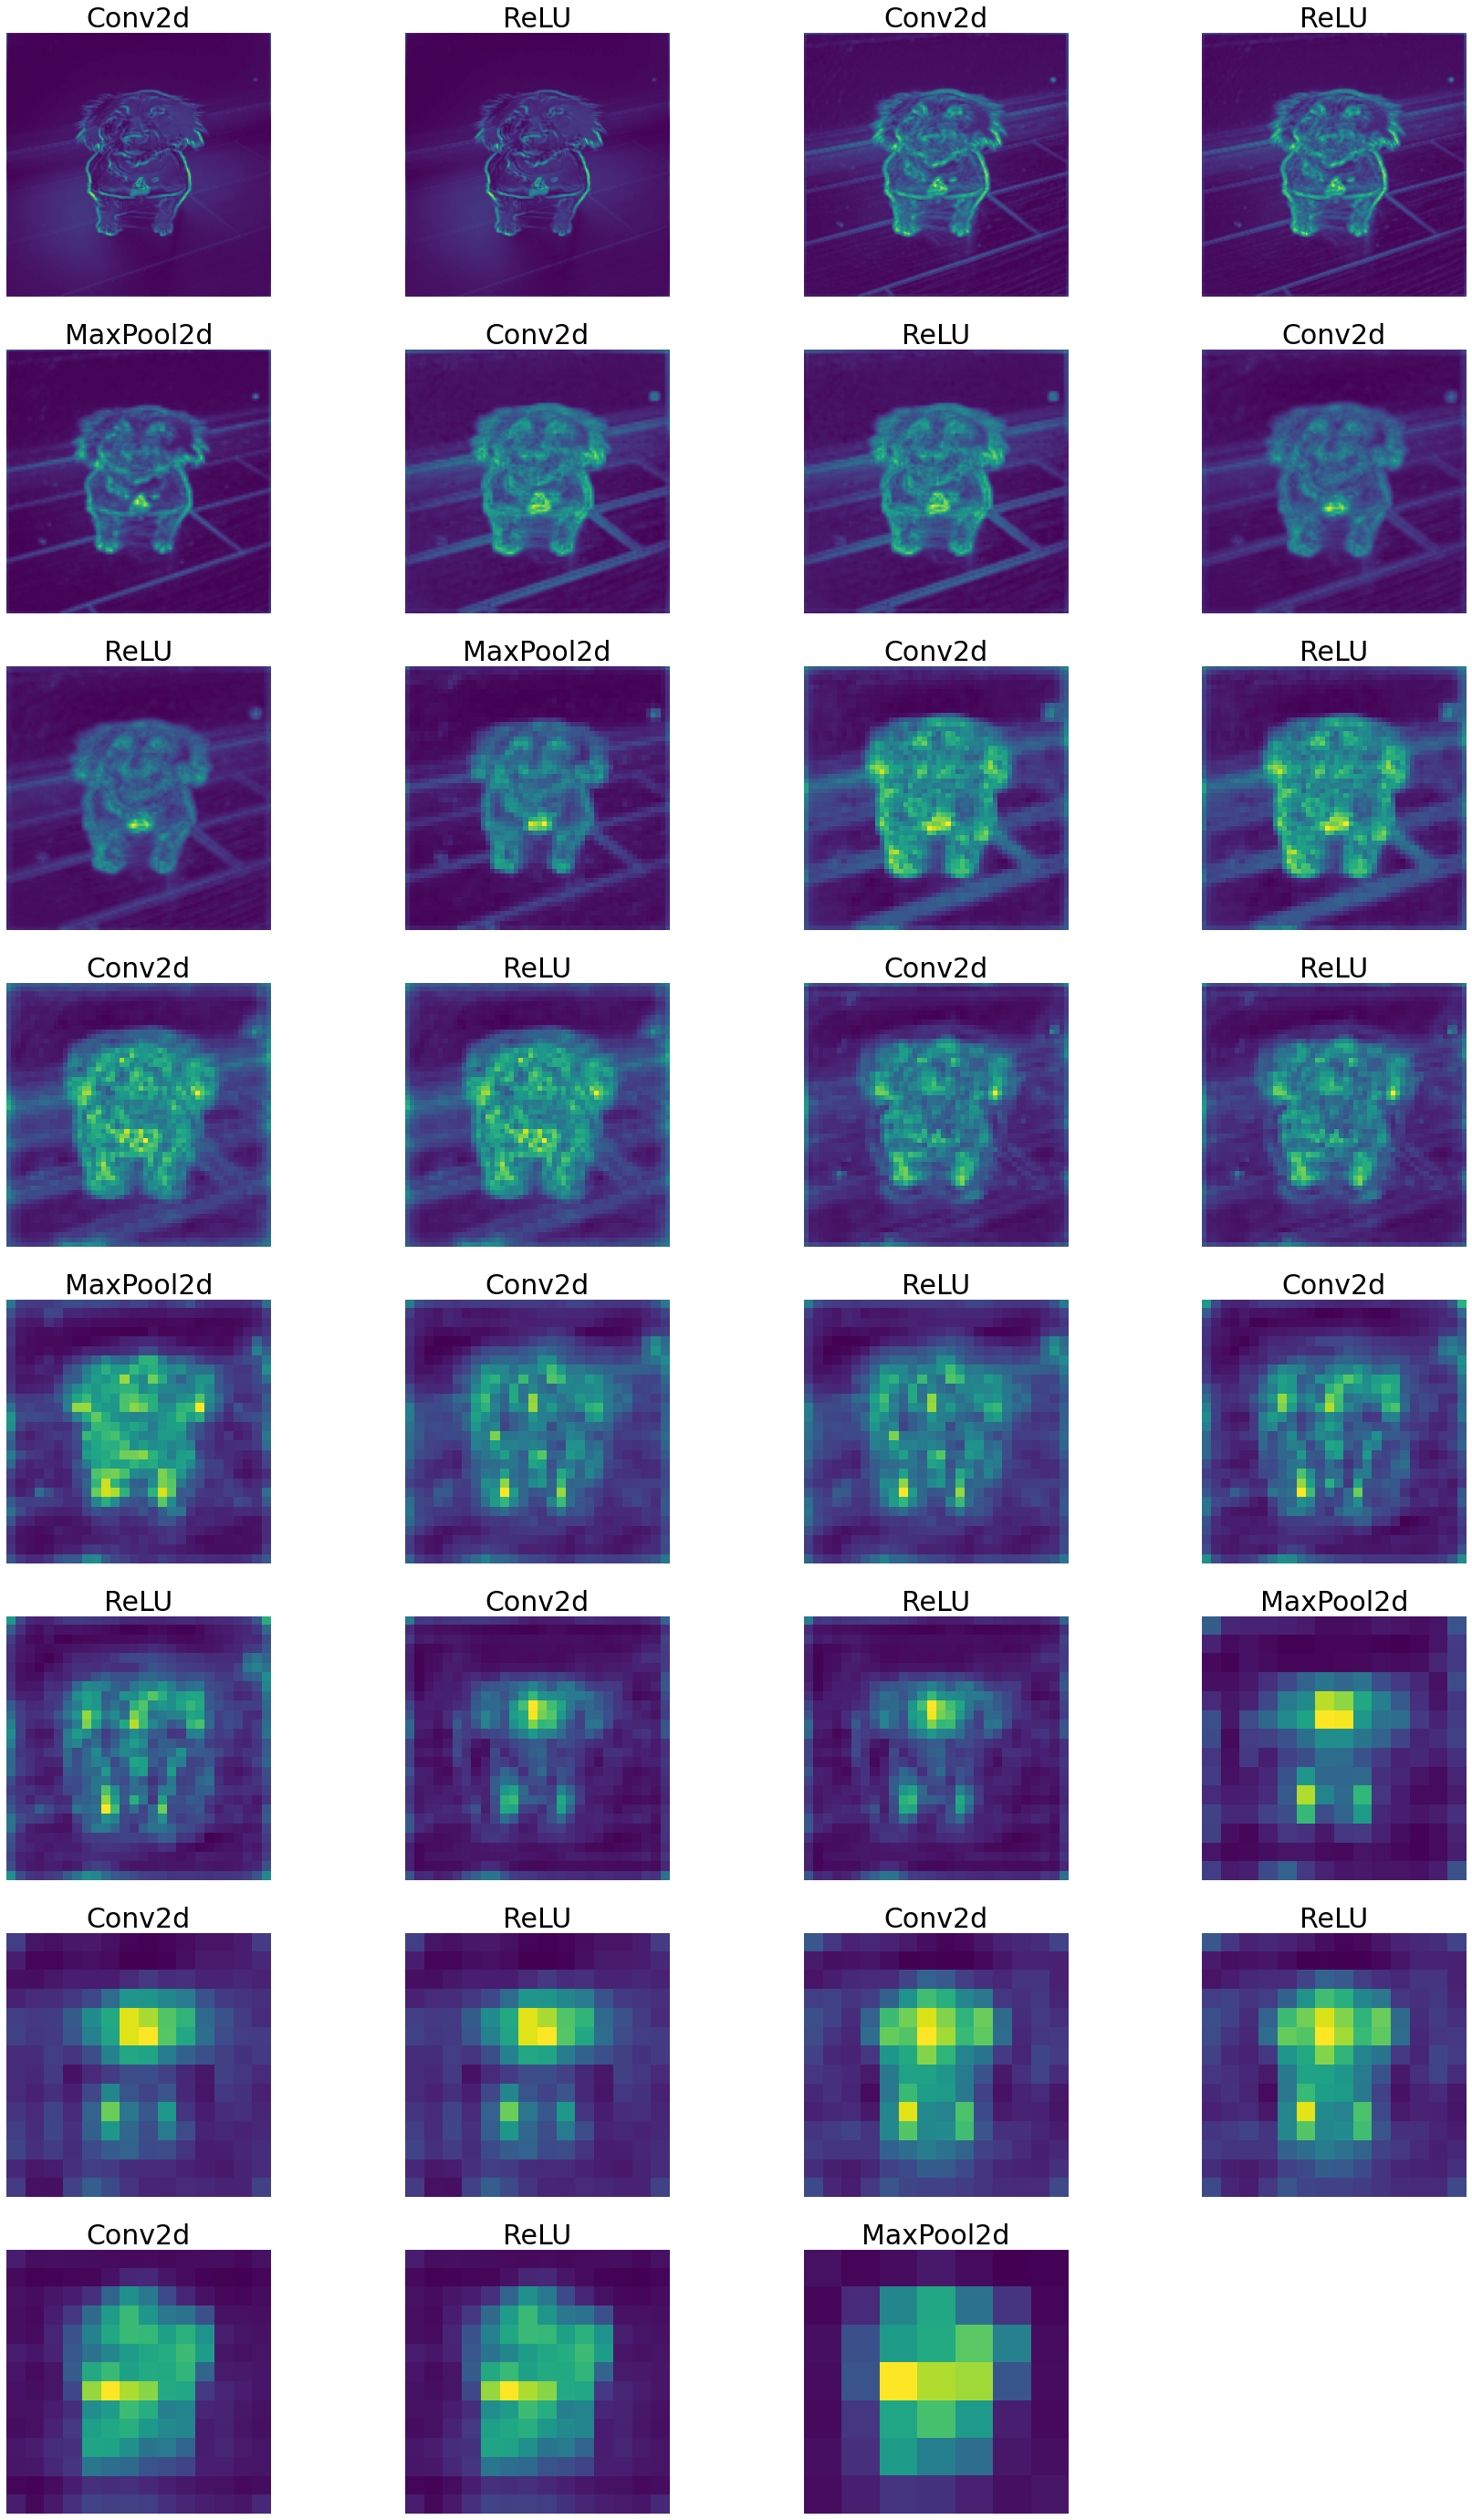

In [60]:
fig = plt.figure(figsize = (30,50))

for i in range(len(processed)):
    a = fig.add_subplot(8,4,i+1)
    imgplot = plt.imshow(processed[i])
    plt.axis('off')
    a.set_title(names[i].split('(')[0], fontsize=30)

plt.savefig('feature_maps.jpg', bbox_inches='tight')